In [1]:
import json
import pandas as pd
import seaborn as sns
from urllib.parse import urlparse, quote, urlencode
from datetime import datetime, timedelta, date
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def loadData(jsonFile):
    with open(jsonFile, "r", encoding='utf-8') as fh:
        data = json.load(fh)
    return data

In [3]:
watchHistoryList = loadData("watch-history.json")

In [4]:
# extracting the data
class Record:
    def __init__(self, url, time):
        self.url = url #self.parseURL(url)
        self.id = self.getId(self.url)
        self.time = self.getTime(time)
           
    def getId(self, url):
        id = urlparse(url).query[2:]
        return id
    
    def getTime(self, timeStr):
        format_ = "%Y-%m-%dT%H:%M:%S"
        try:
            time = datetime.strptime(timeStr[:19], format_) + timedelta(hours=11)
            return time
        except Exception as e:
            print(f"Problem with {timeStr}: {e}")
    
    def row(self):
        return {'url' : self.url,
                'time' : self.time,
                'id' : self.id}

In [5]:
watchHistoryClean = []
skippedEntries = 0
for x in watchHistoryList:
    try: 
        newEntry = Record(x['titleUrl'], x['time']).row()
        watchHistoryClean.append(newEntry)
    except Exception as e:
        skippedEntries += 1
print(skippedEntries)
watchHistoryDF = pd.DataFrame(watchHistoryClean)
print(watchHistoryDF.head())

371
                                           url                time  \
0  https://www.youtube.com/watch?v=DuIK-NuN3aY 2019-12-15 08:43:06   
1  https://www.youtube.com/watch?v=LRVwlif6th0 2019-12-14 16:24:02   
2  https://www.youtube.com/watch?v=saEkj-GPN3o 2019-12-14 15:18:13   
3  https://www.youtube.com/watch?v=EDyWXJN09cA 2019-12-14 12:27:33   
4  https://www.youtube.com/watch?v=2SSiBWS_10A 2019-12-13 22:30:16   

            id  
0  DuIK-NuN3aY  
1  LRVwlif6th0  
2  saEkj-GPN3o  
3  EDyWXJN09cA  
4  2SSiBWS_10A  


In [6]:
videoDict = loadData('videoDict.json')

In [8]:
def getTitle(id):
    try:
        return videoDict[id]['title']
    except Exception as e:
        return "Missing"
watchHistoryDF['title'] = watchHistoryDF.apply(lambda row: getTitle(row['id']), axis = 1)
watchHistoryDF.head()

,url,time,id,title
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...


In [9]:
def testIfMissing(t):
    if len(t) != 0:
        return int(t[0])
    if len(t) == 0:
        return 0

def getDuration(id):
    try:
        timeStr = videoDict[id]['duration']
        hours = re.findall(r"(\d+)H",timeStr)
        minutes = re.findall(r"(\d+)M",timeStr)
        seconds = re.findall(r"(\d+)S",timeStr)
        return timedelta(hours = testIfMissing(hours), minutes = testIfMissing(minutes), seconds = testIfMissing(seconds))
    except Exception as e:
#         print(e)
        return "Missing"
        

watchHistoryDF['duration'] = watchHistoryDF.apply(lambda row: getDuration(row['id']), axis = 1)
watchHistoryDF.head()

,url,time,id,title,duration
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28


In [10]:
def getChannelTitle(id):
    try:
        return videoDict[id]['channelTitle']
    except Exception as e:
        return "Missing"
        
watchHistoryDF['channelTitle'] = watchHistoryDF.apply(lambda row: getChannelTitle(row['id']), axis = 1)
watchHistoryDF.head()

,url,time,id,title,duration,channelTitle
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid


In [13]:
def getTime(timeStr):
        format_ = "%Y-%m-%dT%H:%M:%S"
        try:
            time = datetime.strptime(timeStr[:19], format_) + timedelta(hours=11) # accounts for time diff
            return time
        except Exception as e:
            print(f"Problem with {timeStr}: {e}")

def getPublishedAt(id):
    try:
        timeStr = videoDict[id]['publishedAt']
        return getTime(timeStr)
    except Exception as e:
#         print(e)
        return "Missing"
        
watchHistoryDF['publishedAt'] = watchHistoryDF.apply(lambda row: getPublishedAt(row['id']), axis = 1)
watchHistoryDF.head()

,url,time,id,title,duration,channelTitle,publishedAt
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41


# Drop the rows with "Missing" in them

In [14]:
isMissing = watchHistoryDF["duration"] != "Missing"
df = watchHistoryDF[isMissing].copy(deep=True)
df.head()

,url,time,id,title,duration,channelTitle,publishedAt
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41


In [15]:
df.describe()

,url,time,id,title,duration,channelTitle,publishedAt
count,19200,19200,19200,19200,19200,19200,19200
unique,15418,19190,15418,15391,1613,5796,15268
top,https://www.youtube.com/watch?v=GeMpYsavRl4,2018-02-21 18:23:57,GeMpYsavRl4,Water (Clean) - Chris Brown,0 days 00:04:09,M O S T L Y strings,2017-12-14 02:46:14
freq,46,2,46,46,121,1071,46
first,NaN,2017-06-30 21:22:34,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-15 08:43:06,NaN,NaN,NaN,NaN,NaN


# When am I watching?

In [16]:
df["hour"] = df.apply(lambda row: row['time'].strftime('%H'), axis =1)
df.head()


,url,time,id,title,duration,channelTitle,publishedAt,hour
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01,08
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10,16
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15,15
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15,12
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41,22


In [17]:
df["month"] = df.apply(lambda row: row['time'].strftime('%m'), axis =1)
df.head()


,url,time,id,title,duration,channelTitle,publishedAt,hour,month
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01,08,12
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10,16,12
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15,15,12
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15,12,12
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41,22,12


In [18]:
df["year"] = df.apply(lambda row: row['time'].strftime('%Y'), axis =1)
df.head()


,url,time,id,title,duration,channelTitle,publishedAt,hour,month,year
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01,08,12,2019
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10,16,12,2019
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15,15,12,2019
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15,12,12,2019
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41,22,12,2019


In [19]:
df["weekday"] = df.apply(lambda row: row['time'].strftime('%w'), axis=1)
df.head()

,url,time,id,title,duration,channelTitle,publishedAt,hour,month,year,weekday
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01,08,12,2019,0
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10,16,12,2019,6
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15,15,12,2019,6
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15,12,12,2019,6
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41,22,12,2019,5


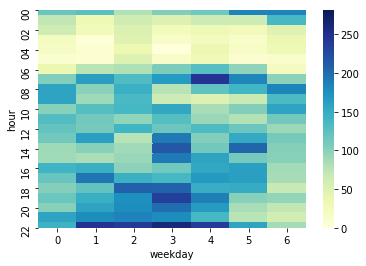

In [20]:
byHourOverWeek = pd.crosstab(df['hour'], df['weekday'])
sns.heatmap(byHourOverWeek, cmap="YlGnBu")

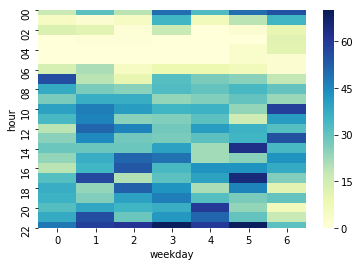

In [21]:
is_2019 = df['year'] == '2019'
df_2019 = df[is_2019]

def makeHeatmap(df):
    byHourOverWeek = pd.crosstab(df['hour'], df['weekday'].sort_values())
    sns.heatmap(byHourOverWeek, cmap="YlGnBu")
    
makeHeatmap(df_2019)

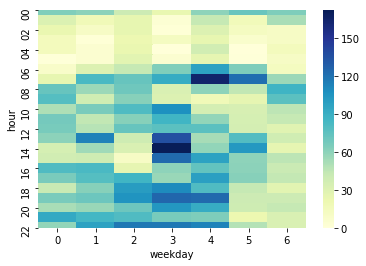

In [22]:
is_2018 = df['year'] == '2018'
df_2018 = df[is_2018]

makeHeatmap(df_2018)

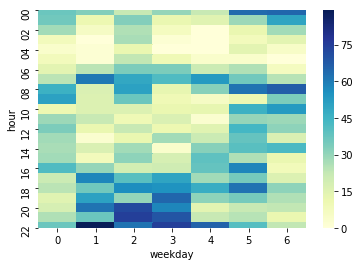

In [23]:
is_2017 = df['year'] == '2017'
df_2017 = df[is_2017]

makeHeatmap(df_2017)

# Categorising videos as short, medium or long

In [24]:
def categorizeLength(duration):
    t = duration.seconds
    if t < 300:
        return "<05min"
    elif t < 10*60:
        return "<10min"
    elif t < 20*60:
        return "<20min"
    elif t > 60*60:
        return "<60min"
    else:
        return ">60min"

df["videoLength"] = df.apply(lambda row: categorizeLength(row['duration']), axis=1)
df.head()


,url,time,id,title,duration,channelTitle,publishedAt,hour,month,year,weekday,videoLength
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01,08,12,2019,0,<05min
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10,16,12,2019,6,<20min
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15,15,12,2019,6,<10min
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15,12,12,2019,6,<20min
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41,22,12,2019,5,<20min


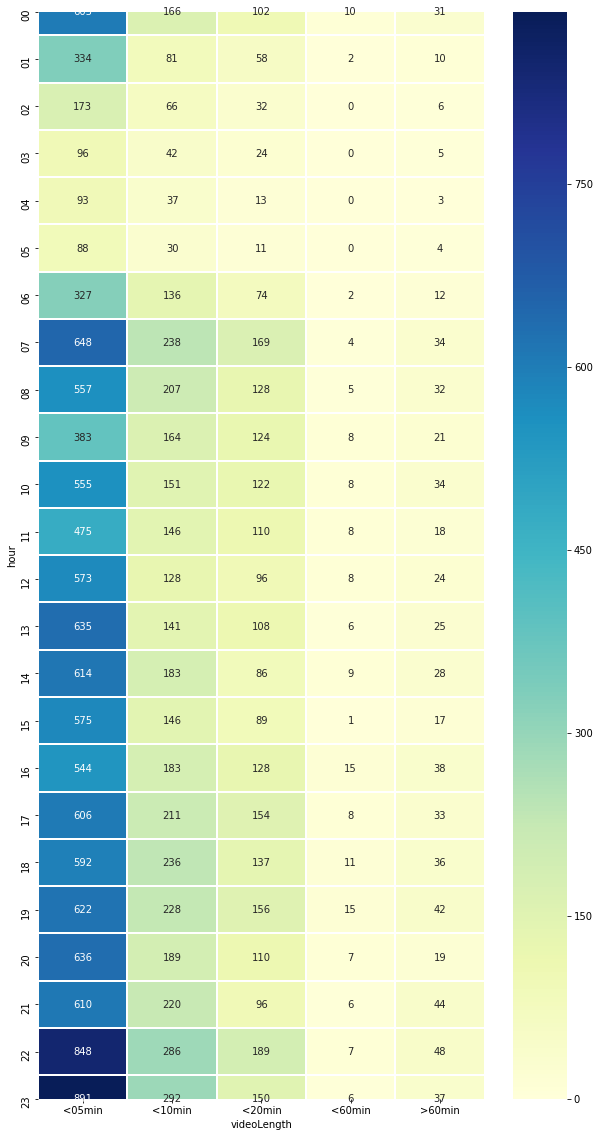

In [25]:
vidLengthvsTime = pd.crosstab(df['hour'], df['videoLength'])
plt.subplots(figsize=(10,20))
sns.heatmap(vidLengthvsTime, cmap="YlGnBu", annot=True, fmt='g', linewidth=1)

# Finding how many hours per day

In [29]:
# making a plain date column
def getPlainDate(date):
    return date.strftime("%Y/%m/%d")

def getMonthDay(date):
    return date.strftime("%m/%d")

df['plainDate'] = df.apply(lambda row: getPlainDate(row['time']), axis=1)
df['monthDay'] = df.apply(lambda row: getMonthDay(row['time']), axis=1)
df.head()

,url,time,id,title,duration,channelTitle,publishedAt,hour,month,year,weekday,videoLength,plainDate,monthDay
0,https://www.youtube.com/watch?v=DuIK-NuN3aY,2019-12-15 08:43:06,DuIK-NuN3aY,Ultrawide Monitor Tips 2.0! Improved Windows M...,0:02:51,David Zhang,2018-02-10 02:00:01,08,12,2019,0,<05min,2019/12/15,12/15
1,https://www.youtube.com/watch?v=LRVwlif6th0,2019-12-14 16:24:02,LRVwlif6th0,Getting the Hollywood Look Without the Hollywo...,0:16:02,Corridor Crew,2019-12-14 04:00:10,16,12,2019,6,<20min,2019/12/14,12/14
2,https://www.youtube.com/watch?v=saEkj-GPN3o,2019-12-14 15:18:13,saEkj-GPN3o,Top 4 Programming Languages To Learn In 2020,0:07:34,Kalle Hallden,2019-12-14 01:00:15,15,12,2019,6,<10min,2019/12/14,12/14
3,https://www.youtube.com/watch?v=EDyWXJN09cA,2019-12-14 12:27:33,EDyWXJN09cA,Ravenous Project Interacting with the Yelp API,0:16:24,Codecademy,2018-11-29 02:32:15,12,12,2019,6,<20min,2019/12/14,12/14
4,https://www.youtube.com/watch?v=2SSiBWS_10A,2019-12-13 22:30:16,2SSiBWS_10A,Top 5 GENIUS Movie Character Moments Portrayin...,0:14:28,Pow Asteroid,2018-10-29 18:55:41,22,12,2019,5,<20min,2019/12/13,12/13


In [38]:
# making a pivot table of plainDate v duration
dateVduration = pd.pivot_table(df, index='plainDate', values='duration', aggfunc='sum')

# converting the timedelta to a float
def getMinutesFromDuration(t):
    """Must be a timedelta object"""
    try:
        return round(t.seconds/60, 2)
    except Exception as e:
        print(e)
        return "Missing"

dateVduration['minutes'] = dateVduration.apply(lambda row: getMinutesFromDuration(row['duration']), axis =1)
dateVduration.head()


,duration,minutes
plainDate,,
2017/06/30,00:12:10,12.17
2017/07/01,01:53:24,113.40
2017/07/02,02:13:33,133.55
2017/07/03,02:17:31,137.52
2017/07/04,01:15:32,75.53


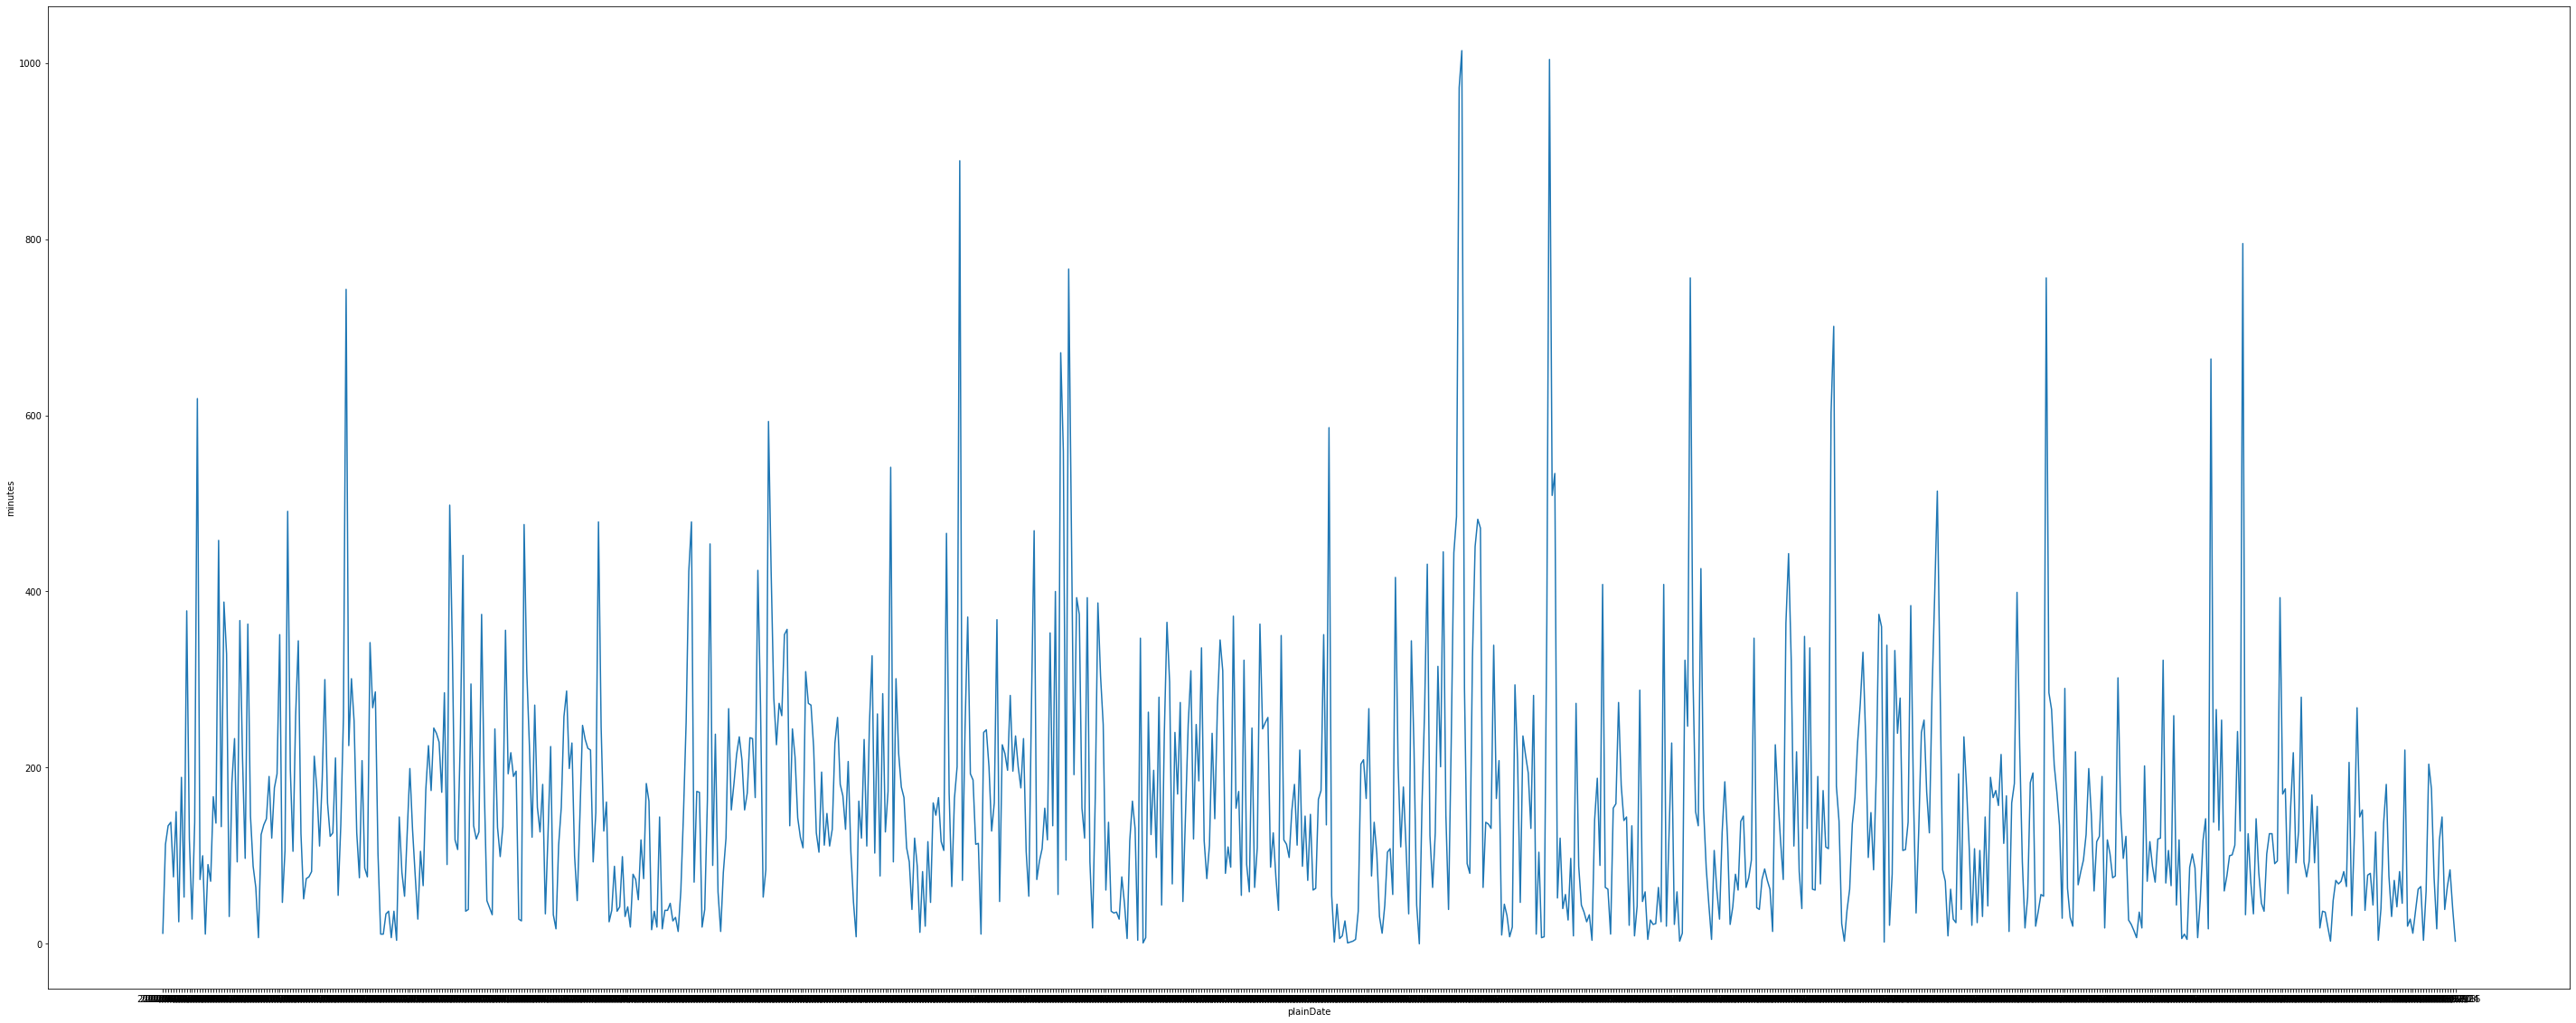

In [34]:
plt.subplots(figsize=(50,20))
sns.lineplot(x=dateVduration.index, y=dateVduration['minutes'])

# Comparing the years based on the day in the year

In [53]:
# make a new dataframe that goes from 2017/06/30 to 2019/12/15
dates = []

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2017, 6, 30)
end_dt = date(2019, 12, 15)
for dt in daterange(start_dt, end_dt):
    dates.append(dt.strftime("%Y/%m/%d"))

# constructing the dataframe
allDates = pd.DataFrame({'date': dates})
allDates.head()

,date
0,2017/06/30
1,2017/07/01
2,2017/07/02
3,2017/07/03
4,2017/07/04


In [55]:
# to fill these in, I need create a lookup dictionary
lookup = dict(zip(dateVduration.index, dateVduration['minutes']))

# a method of extracting
def getMinutesFromLookup(date):
    try:
        return lookup[date]
    except Exception as e:
        return 0
    
# apply to allDates
allDates['minutesWatched'] = allDates.apply(lambda row: getMinutesFromLookup(row['date']), axis=1)
allDates.head()

,date,minutesWatched
0,2017/06/30,12.17
1,2017/07/01,113.40
2,2017/07/02,133.55
3,2017/07/03,137.52
4,2017/07/04,75.53


In [102]:
# adding the year and month to each
allDates['year'] = allDates.apply(lambda row: row['date'][:4], axis=1)
allDates['monthDay'] = allDates.apply(lambda row: row['date'][5:], axis=1)

#filling the gaps with zeroes
allDates.fillna(0, inplace=True)
allDates.head()

,date,minutesWatched,year,monthDay
0,2017/06/30,12.17,2017,06/30
1,2017/07/01,113.40,2017,07/01
2,2017/07/02,133.55,2017,07/02
3,2017/07/03,137.52,2017,07/03
4,2017/07/04,75.53,2017,07/04


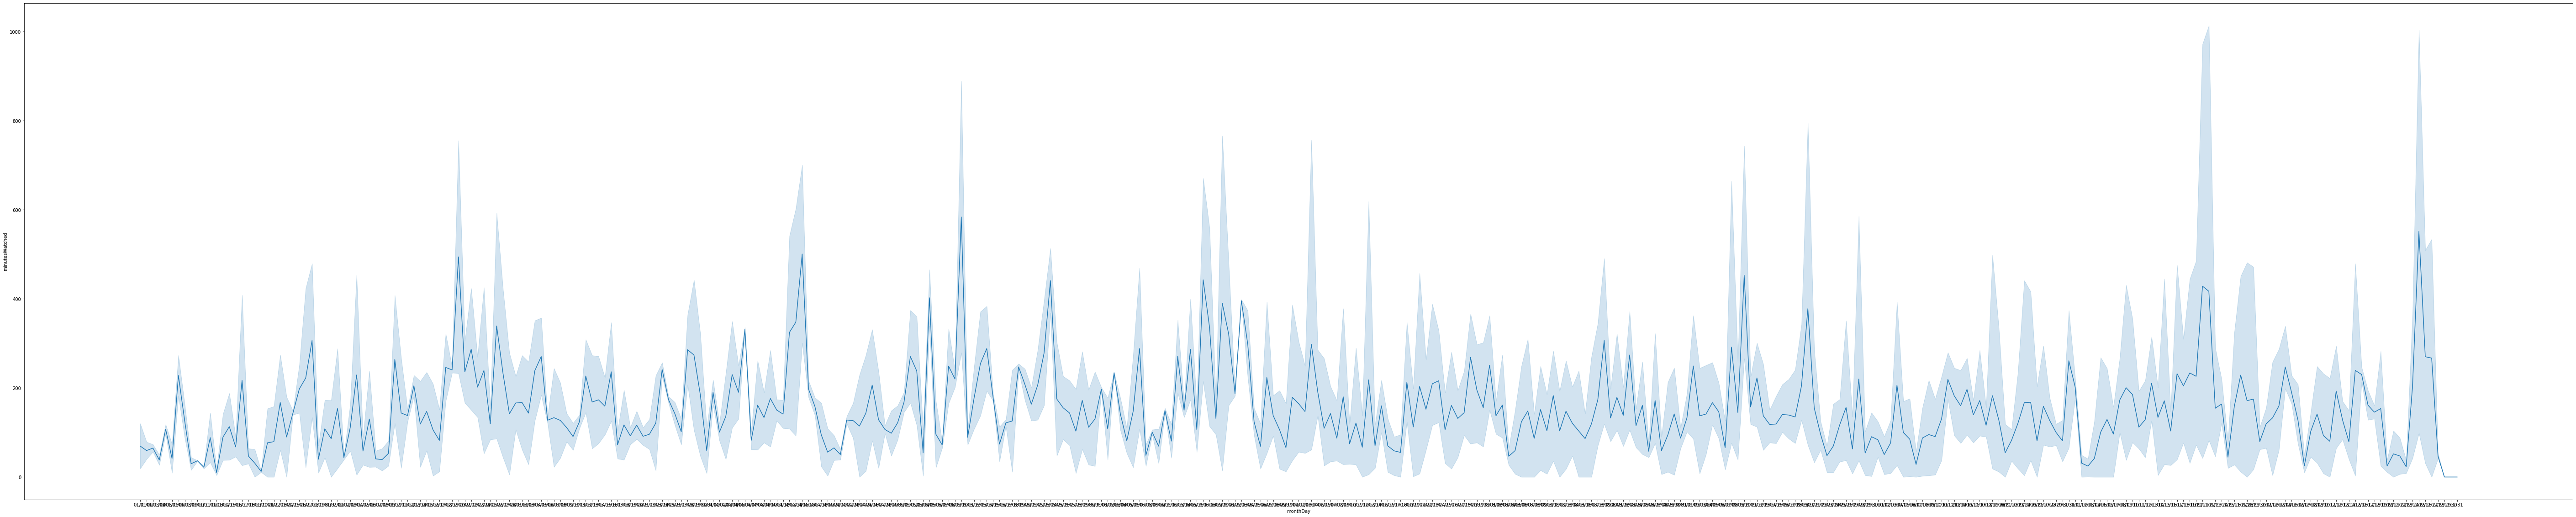

In [104]:
# attempting to plot
plt.subplots(figsize=(100,20))
sns.lineplot(x="monthDay", y="minutesWatched", data=allDates)

In [99]:
toPlot = pd.pivot_table(allDates, index='monthDay', columns='year', values='minutesWatched', aggfunc='sum')
toPlot.fillna(0, inplace=True)# toPlot


year,2017,2018,2019
monthDay,,,
01/01,0.00,18.95,120.00
01/02,0.00,78.65,40.05
01/03,0.00,73.23,56.47
01/04,0.00,49.58,26.77
01/05,0.00,117.92,96.93
...,...,...,...
12/27,0.00,534.18,0.00
12/28,41.63,52.07,0.00
12/29,0.00,0.00,0.00


In [90]:
times = df['duration']
duration = sum(times, timedelta())
duration

datetime.timedelta(days=95, seconds=30870)

KeyError: 'monthDay'

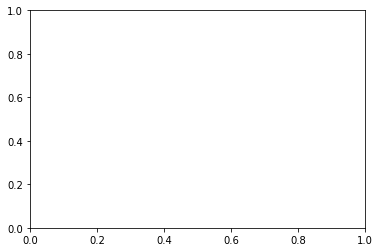

In [101]:
ax = plt.gca()

toPlot.plot(kind='line',x="monthDay",y='2017', color = 'blue', ax=ax)
toPlot.plot(kind='line',x="monthDay",y='2018', color='red', ax=ax)
toPlot.plot(kind='line',x="monthDay",y='2019', color='green', ax=ax)
plt.show()